In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime 

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

sns.set(rc={'figure.figsize':(15,10)})

In [2]:
users = pd.read_csv('takehome_users.csv', encoding='latin-1')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [4]:
users['creation_time'] = users['creation_time'].astype('datetime64[ns]')
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'],unit='s')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [5]:
users.describe(include='all')

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,12000,12000,12000,12000,8823,12000.000000,12000.000000,12000.000000,6417.000000
unique,NaN,11996,11355,11980,5,8821,NaN,NaN,NaN,NaN
top,NaN,2014-02-11 17:57:53,Araujo Gabriela,MaximilianWalter@gmail.com,ORG_INVITE,2014-06-04 21:21:37,NaN,NaN,NaN,NaN
freq,NaN,2,5,2,4254,2,NaN,NaN,NaN,NaN
first,NaN,2012-05-31 00:43:27,NaN,NaN,NaN,2012-05-31 08:20:06,NaN,NaN,NaN,NaN
last,NaN,2014-05-30 23:59:19,NaN,NaN,NaN,2014-06-06 14:58:50,NaN,NaN,NaN,NaN
mean,6000.50000,NaN,NaN,NaN,NaN,NaN,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,NaN,NaN,NaN,NaN,NaN,0.432742,0.356432,124.056723,3383.761968
min,1.00000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,29.000000,3058.000000


In [6]:
users.isnull().values.all()

False

In [7]:
print('unique object_ids:',len(users.object_id.unique()))
print('unique emails:',len(users.email.unique()))
print('opted to mailing list:',users.opted_in_to_mailing_list.unique())
print('marketing drip enabled:',users.enabled_for_marketing_drip.unique())
print('unique orgs:',len(users.org_id.unique()))
print('invited by users:',len(users.invited_by_user_id.unique()))

unique object_ids: 12000
unique emails: 11980
opted to mailing list: [1 0]
marketing drip enabled: [0 1]
unique orgs: 417
invited by users: 2565


In [8]:
# removing duplicate emails.
users = users.drop_duplicates(['email'], keep='first')
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11980 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     11980 non-null int64
creation_time                 11980 non-null datetime64[ns]
name                          11980 non-null object
email                         11980 non-null object
creation_source               11980 non-null object
last_session_creation_time    8808 non-null datetime64[ns]
opted_in_to_mailing_list      11980 non-null int64
enabled_for_marketing_drip    11980 non-null int64
org_id                        11980 non-null int64
invited_by_user_id            6409 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 1.0+ MB


In [9]:
user_engagement = pd.read_csv('takehome_user_engagement.csv')
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [10]:
user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [11]:
user_engagement['time_stamp'] = user_engagement['time_stamp'].astype('datetime64[ns]')
user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [12]:
user_engagement.describe(include='all')

,time_stamp,user_id,visited
count,207917,207917.000000,207917.0
unique,207220,NaN,NaN
top,2014-02-05 03:09:54,NaN,NaN
freq,2,NaN,NaN
first,2012-05-31 08:20:06,NaN,NaN
last,2014-06-06 14:58:50,NaN,NaN
mean,NaN,5913.314197,1.0
std,NaN,3394.941674,0.0
min,NaN,1.000000,1.0
25%,NaN,3087.000000,1.0


In [13]:
user_engagement.isnull().values.all()

False

In [14]:
print('unique users:',len(user_engagement.user_id.unique()))
print(user_engagement.visited.unique())

unique users: 8823
[1]


## There are 8823 unique users visited users.

In [15]:
user_engagement['login_weekday_name'] = user_engagement['time_stamp'].dt.weekday_name
user_engagement.head()

,time_stamp,user_id,visited,login_weekday_name
0,2014-04-22 03:53:30,1,1,Tuesday
1,2013-11-15 03:45:04,2,1,Friday
2,2013-11-29 03:45:04,2,1,Friday
3,2013-12-09 03:45:04,2,1,Monday
4,2013-12-25 03:45:04,2,1,Wednesday


In [16]:
def delta_days(df):
    df['delta_days'] = (df['time_stamp']-df['time_stamp'].shift()).fillna(0)
    return df

In [17]:
user_engagement = user_engagement.groupby(['user_id']).apply(lambda x: delta_days(x))
user_engagement.head()

,time_stamp,user_id,visited,login_weekday_name,delta_days
0,2014-04-22 03:53:30,1,1,Tuesday,0 days
1,2013-11-15 03:45:04,2,1,Friday,0 days
2,2013-11-29 03:45:04,2,1,Friday,14 days
3,2013-12-09 03:45:04,2,1,Monday,10 days
4,2013-12-25 03:45:04,2,1,Wednesday,16 days


In [18]:
user_engagement['delta'] = user_engagement['delta_days']/ np.timedelta64(1, 'D')
user_engagement.head()

,time_stamp,user_id,visited,login_weekday_name,delta_days,delta
0,2014-04-22 03:53:30,1,1,Tuesday,0 days,0.0
1,2013-11-15 03:45:04,2,1,Friday,0 days,0.0
2,2013-11-29 03:45:04,2,1,Friday,14 days,14.0
3,2013-12-09 03:45:04,2,1,Monday,10 days,10.0
4,2013-12-25 03:45:04,2,1,Wednesday,16 days,16.0


In [19]:
def is_adopted_user(df):   
    df['adopted_user'] = (df['delta'].shift(0) + df['delta'].shift(1) + df['delta'].shift(2)) <= 8
    return df

In [20]:
user_engagement = user_engagement.groupby(['user_id']).apply(lambda x: is_adopted_user(x))
user_engagement.head()

,time_stamp,user_id,visited,login_weekday_name,delta_days,delta,adopted_user
0,2014-04-22 03:53:30,1,1,Tuesday,0 days,0.0,False
1,2013-11-15 03:45:04,2,1,Friday,0 days,0.0,False
2,2013-11-29 03:45:04,2,1,Friday,14 days,14.0,False
3,2013-12-09 03:45:04,2,1,Monday,10 days,10.0,False
4,2013-12-25 03:45:04,2,1,Wednesday,16 days,16.0,False


In [21]:
adopted_users = user_engagement.groupby(['user_id'])['adopted_user'].count().apply(lambda x : True if x>1 else False).reset_index()
adopted_users.head()

,user_id,adopted_user
0,1,False
1,2,True
2,3,False
3,4,False
4,5,False


In [22]:
adopted_ = adopted_users[adopted_users['adopted_user'] == 1]
print(adopted_.size)

print(adopted_.size/adopted_users.size)

5176
0.293324266122634


## 29% of the users are adopted users from user_engagement list.

### Merge the data frames.

In [23]:
merged = pd.merge(users, adopted_users, left_index=True, left_on='object_id', right_on='user_id')
merged.tail()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted_user
8818,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0,11996,False
8819,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,NaN,11997,False
8820,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074.0,11998,False
8821,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,NaN,11999,False
8822,12000,2014-01-26 08:57:12,Lima Thaís,ThaisMeloLima@hotmail.com,SIGNUP,2014-01-26 08:57:12,0,1,0,NaN,12000,False


## By merging, removing users who do not have any activity info.

In [24]:
print('unique object_ids:',len(merged.object_id.unique()))
print('unique emails:',len(merged.email.unique()))
print('opted to mailing list:',merged.opted_in_to_mailing_list.unique())
print('marketing drip enabled:',merged.enabled_for_marketing_drip.unique())
print('unique orgs:',len(merged.org_id.unique()))
print('invited by users:',len(merged.invited_by_user_id.unique()))

unique object_ids: 8808
unique emails: 8808
opted to mailing list: [1 0]
marketing drip enabled: [0 1]
unique orgs: 417
invited by users: 2228


In [25]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8808 entries, 0 to 8822
Data columns (total 12 columns):
object_id                     8808 non-null int64
creation_time                 8808 non-null datetime64[ns]
name                          8808 non-null object
email                         8808 non-null object
creation_source               8808 non-null object
last_session_creation_time    8808 non-null datetime64[ns]
opted_in_to_mailing_list      8808 non-null int64
enabled_for_marketing_drip    8808 non-null int64
org_id                        8808 non-null int64
invited_by_user_id            4770 non-null float64
user_id                       8808 non-null int64
adopted_user                  8808 non-null bool
dtypes: bool(1), datetime64[ns](2), float64(1), int64(5), object(3)
memory usage: 834.4+ KB


In [26]:
merged.describe(include='all')

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted_user
count,8808.000000,8808,8808,8808,8808,8808,8808.000000,8808.000000,8808.000000,4770.000000,8808.000000,8808
unique,NaN,8806,8451,8808,5,8806,NaN,NaN,NaN,NaN,NaN,2
top,NaN,2014-02-11 17:57:53,Cavalcanti Victor,JordanPerry@gmail.com,ORG_INVITE,2014-06-04 07:46:58,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,2,4,1,3185,2,NaN,NaN,NaN,NaN,NaN,6222
first,NaN,2012-05-31 00:43:27,NaN,NaN,NaN,2012-05-31 08:20:06,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2014-05-30 23:59:19,NaN,NaN,NaN,2014-06-06 14:58:50,NaN,NaN,NaN,NaN,NaN,NaN
mean,6017.236603,NaN,NaN,NaN,NaN,NaN,0.252157,0.151794,142.499546,5982.798113,6017.236603,NaN
std,3464.735249,NaN,NaN,NaN,NaN,NaN,0.434276,0.358841,124.187649,3393.276318,3464.735249,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,3.000000,1.000000,NaN
25%,3013.750000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,30.000000,3072.500000,3013.750000,NaN


In [27]:
merged['invited_by_user_id'] = merged['invited_by_user_id'].fillna(0)
merged['adopted_user'] = (merged['adopted_user'] == True).astype(int)
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8808 entries, 0 to 8822
Data columns (total 12 columns):
object_id                     8808 non-null int64
creation_time                 8808 non-null datetime64[ns]
name                          8808 non-null object
email                         8808 non-null object
creation_source               8808 non-null object
last_session_creation_time    8808 non-null datetime64[ns]
opted_in_to_mailing_list      8808 non-null int64
enabled_for_marketing_drip    8808 non-null int64
org_id                        8808 non-null int64
invited_by_user_id            8808 non-null float64
user_id                       8808 non-null int64
adopted_user                  8808 non-null int32
dtypes: datetime64[ns](2), float64(1), int32(1), int64(5), object(3)
memory usage: 860.2+ KB


In [28]:
merged.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,1,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,3,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,4,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,5,0


### Now we have a clean set to do analysis.

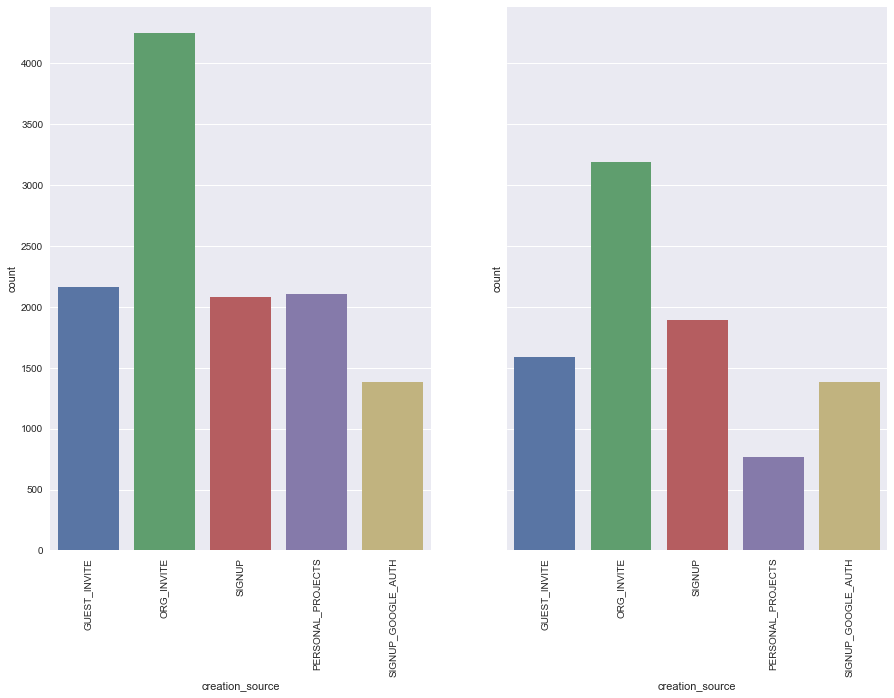

In [29]:
fig, ax =plt.subplots(ncols=2, sharey=True, sharex=True)
sns.countplot(users['creation_source'], ax=ax[0])
sns.countplot(merged['creation_source'], ax=ax[1])
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
plt.legend()
plt.show()

By removing in-active users the distribution of screation_ources decrease, especially GUEST_INVITE, ORG_INVITE, PERSONAL_PROJECTS count go down hugely.

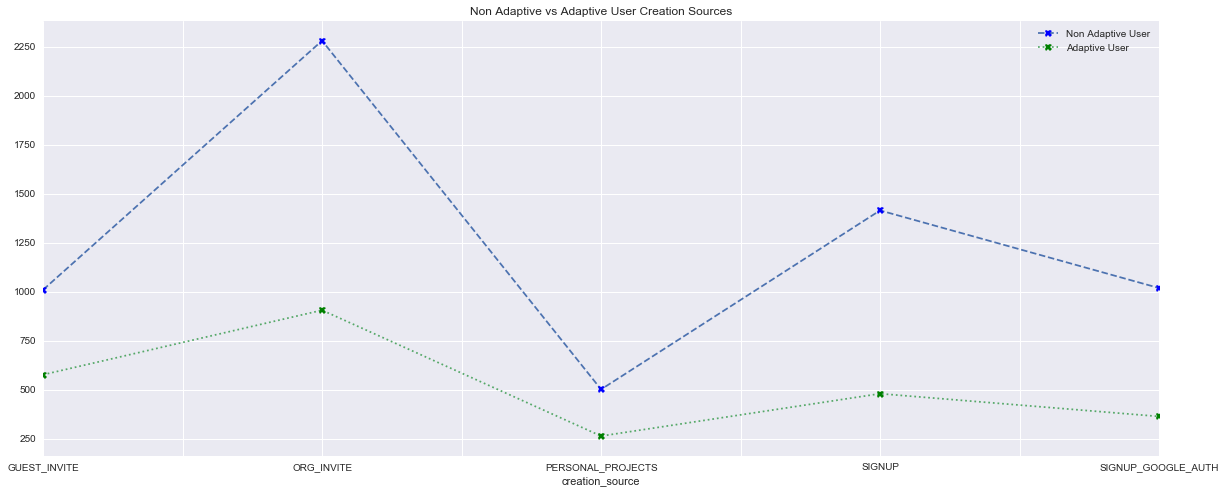

In [30]:
adopted = merged[merged['adopted_user'] == True]
not_adopted = merged[merged['adopted_user'] == False]
not_adopted.groupby(['creation_source'])['creation_source'].agg('count').plot(style='X--', markerfacecolor='blue', figsize=(20,8))
adopted.groupby(['creation_source'])['creation_source'].agg('count').plot(style='X:', markerfacecolor='green', figsize=(20,8))
plt.legend(['Non Adaptive User', 'Adaptive User'])
plt.title('Non Adaptive vs Adaptive User Creation Sources')
plt.show()

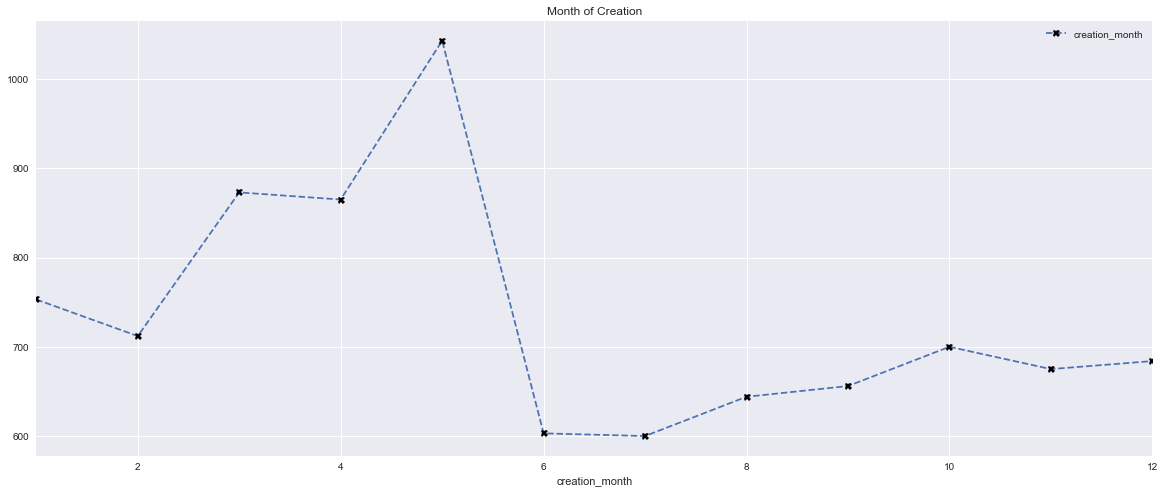

In [31]:
merged['creation_month'] = merged['creation_time'].dt.month
merged.groupby(['creation_month'])['creation_month'].agg('count').plot(style='X--', markerfacecolor='black', figsize=(20,8))
plt.title('Month of Creation')
plt.legend()
plt.show()

Majority creation month was 5th month.

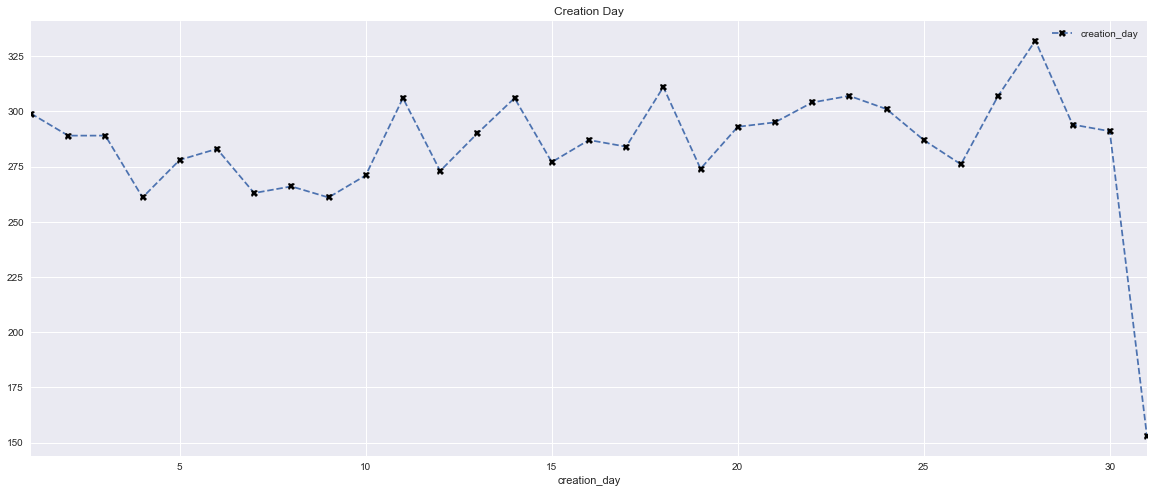

In [32]:
merged['creation_day'] = merged['creation_time'].dt.day
merged.groupby(['creation_day'])['creation_day'].agg('count').plot(style='X--', markerfacecolor='black', figsize=(20,8))
plt.title('Creation Day')
plt.legend()
plt.show()

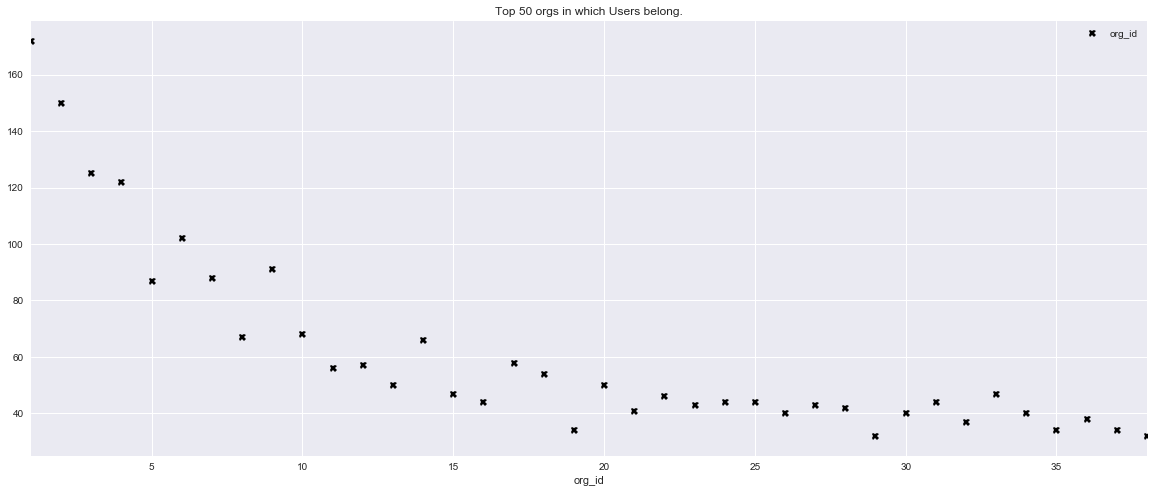

In [33]:
non_zero_org_id = merged.loc[merged['org_id'] != 0]
non_zero_org_id.groupby(['org_id'])['org_id'].agg('count').nlargest(50).plot(style='X', markerfacecolor='black', figsize=(20,8))
plt.legend()
plt.title('Top 50 orgs in which Users belong.')
plt.show()

We see 15 orgs which have more than 50 users in them.

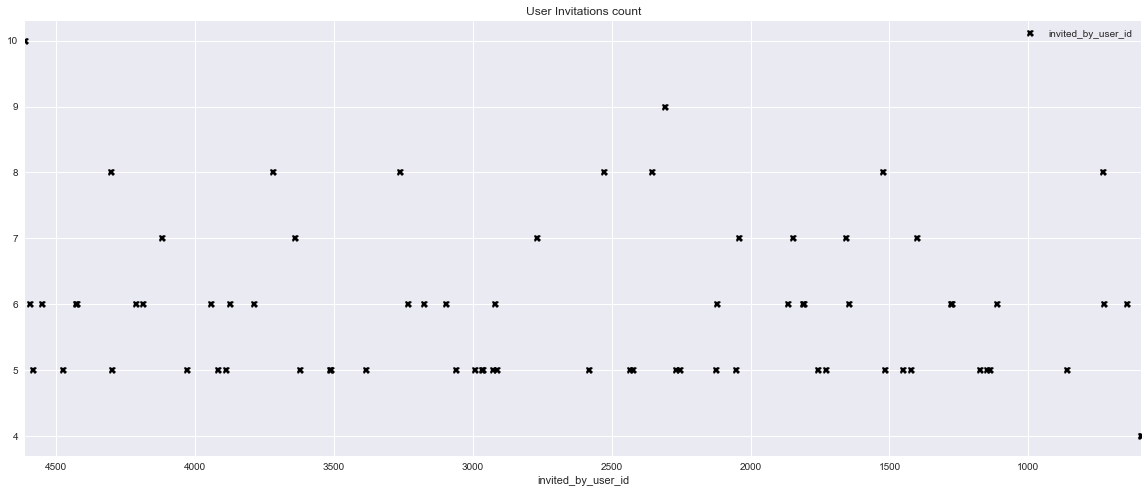

In [34]:
non_zero_invited_by_user_id = merged.loc[merged['invited_by_user_id'] != 0]
non_zero_invited_by_user_id.groupby(['invited_by_user_id'])['invited_by_user_id'].agg('count').nlargest(200).plot(style='X', markerfacecolor='black', figsize=(20,8))
plt.legend()
plt.title('User Invitations count')
plt.show()

There are few users who sent out more than 5 invitations.

In [35]:
merged['creation_year'] = merged['creation_time'].dt.year
merged['creation_month'] = merged['creation_time'].dt.month
merged['creation_day'] = merged['creation_time'].dt.day
merged['last_session_creation_year'] = merged['last_session_creation_time'].dt.year
merged['last_session_creation_month'] = merged['last_session_creation_time'].dt.month
merged['last_session_creation_day'] = merged['last_session_creation_time'].dt.day
merged.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted_user,creation_month,creation_day,creation_year,last_session_creation_year,last_session_creation_month,last_session_creation_day
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,1,0,4,22,2014,2014,4,22
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2,1,11,15,2013,2014,3,31
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,3,0,3,19,2013,2013,3,19
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,4,0,5,21,2013,2013,5,22
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,5,0,1,17,2013,2013,1,22


In [36]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8808 entries, 0 to 8822
Data columns (total 18 columns):
object_id                      8808 non-null int64
creation_time                  8808 non-null datetime64[ns]
name                           8808 non-null object
email                          8808 non-null object
creation_source                8808 non-null object
last_session_creation_time     8808 non-null datetime64[ns]
opted_in_to_mailing_list       8808 non-null int64
enabled_for_marketing_drip     8808 non-null int64
org_id                         8808 non-null int64
invited_by_user_id             8808 non-null float64
user_id                        8808 non-null int64
adopted_user                   8808 non-null int32
creation_month                 8808 non-null int64
creation_day                   8808 non-null int64
creation_year                  8808 non-null int64
last_session_creation_year     8808 non-null int64
last_session_creation_month    8808 non-null int64
las

Dropping the fields which are not needed.

In [37]:
drop_columns = ['object_id', 'creation_time', 'name', 'email', 'last_session_creation_time', 'user_id', 'creation_month' ]
merged.drop(drop_columns, inplace=True, axis=1)

In [38]:
dummy = pd.get_dummies(merged['creation_source'])
merged = pd.concat([merged, dummy], axis=1)
merged.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,creation_day,creation_year,last_session_creation_year,last_session_creation_month,last_session_creation_day,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,GUEST_INVITE,1,0,11,10803.0,0,22,2014,2014,4,22,1,0,0,0,0
1,ORG_INVITE,0,0,1,316.0,1,15,2013,2014,3,31,0,1,0,0,0
2,ORG_INVITE,0,0,94,1525.0,0,19,2013,2013,3,19,0,1,0,0,0
3,GUEST_INVITE,0,0,1,5151.0,0,21,2013,2013,5,22,1,0,0,0,0
4,GUEST_INVITE,0,0,193,5240.0,0,17,2013,2013,1,22,1,0,0,0,0


In [39]:
merged.drop(['creation_source'], inplace=True, axis=1)

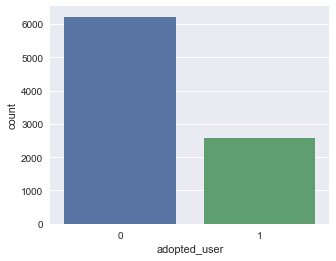

Adopted users: 38790
Fraction: 0.2935967302452316


In [40]:
plt.figure(figsize=(5,4))
sns.countplot(merged['adopted_user'])
plt.show()
adopted_usrs = merged[merged['adopted_user'] == 1]
print('Adopted users:',adopted_usrs.size)
print('Fraction:',adopted_usrs.size/merged.size)

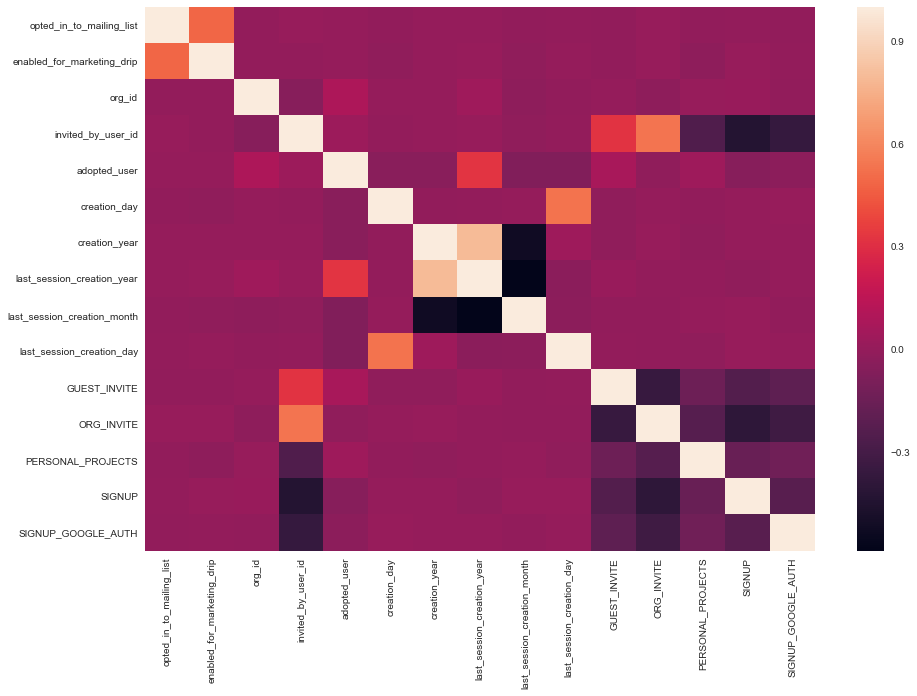

In [41]:
sns.heatmap(merged.corr())
plt.show()

From the heat map we see some strong correlations between some features.
1. Between opted_in_to_mailing_list, enabled_for_marketing_drip
2. GUEST_INVITE,ORG_INVITE for invited_by_user_id

## Building predictive model.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 42

In [43]:
def print_reports(pred, true, report='classification report'):
    print(60*'-')
    if (report == 'classification report'):
        print('CLASSIFICATION REPORT')
        print(classification_report(pred, true))
    elif (report == 'confusion matrix'):
        print('CONFUSION MATRIX')
        print(confusion_matrix(pred, true))
    else:
        print('ACCURACY SCORE')
        print(accuracy_score(pred, true))
    print(60*'-')

Splitting into features and target labels.<br>
And splitting the data into train, test split.

In [44]:
features = merged.drop('adopted_user', axis=1)
target = merged['adopted_user']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30,random_state=RANDOM_STATE)

In [45]:
clf = RandomForestClassifier(random_state=RANDOM_STATE)

clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)

print_reports(y_pred, y_test,'classification report')
#print_reports(y_pred, y_test,'confusion matrix')
#print_reports(y_pred, y_test,'accuracy')

------------------------------------------------------------
CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.99      0.89      0.94      2091
          1       0.70      0.98      0.82       552

avg / total       0.93      0.91      0.91      2643

------------------------------------------------------------


The classifier did a good prediction, we can improve the classifier by tuning hyper-parameters.

In [46]:
from sklearn.model_selection import RandomizedSearchCV

def randomForestRandomizedSearchCV() :

    clf = RandomForestClassifier(random_state=RANDOM_STATE)
    
    criterion = ['gini', 'entropy']

    n_estimators = [int(x) for x in np.linspace(10, 200, num = 200)]

    max_features = ['auto', 'sqrt', 'log2', None]

    max_depth = [int(x) for x in np.linspace(10, 100, num = 100)]
    max_depth.append(None)

    min_samples_split = [2, 5, 10]

    min_samples_leaf = [1, 2, 4]

    bootstrap = [True]

    warm_start= [True, False]
    
    class_weight = ['balanced_subsample','balanced']
    
    oob_score = [True, False]

    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                   'oob_score': oob_score,
                   'criterion': criterion,
                   'class_weight': class_weight,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap,
                   'warm_start': warm_start}
    #print(random_grid)

    # Use the random grid to search for best hyperparameters
    random_search_cv_ = RandomizedSearchCV(estimator = clf,
                                           param_distributions = random_grid,
                                           n_iter = 10,
                                           cv = 5,
                                           verbose=10,
                                           random_state=RANDOM_STATE,
                                           n_jobs = -1)
    return random_search_cv_

In [47]:
oscv = randomForestRandomizedSearchCV()

oscv.fit(X_train, y_train)

y_train_pred = oscv.predict(X_train)

print(oscv.best_params_)

y_pred = oscv.predict(X_test)

print_reports(y_pred, y_test,'classification report')
#print_reports(y_pred, y_test,'confusion matrix')
#print_reports(y_pred, y_test,'accuracy')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:   14.3s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:   14.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   15.5s finished
C:\Users\ra029810\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:497: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class freq

{'warm_start': True, 'oob_score': False, 'n_estimators': 60, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 48, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}
------------------------------------------------------------
CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.99      0.94      0.97      1986
          1       0.84      0.98      0.91       657

avg / total       0.96      0.95      0.95      2643

------------------------------------------------------------


After tuning the hyper-parameters, the classifier metrics did improve.

And since we are dealing with minorty class we can use Oversampling techniques to maximize the minority class and train the model.

In [48]:
from imblearn.over_sampling import SMOTE # (Synthetic Minority Oversampling Technique)

oversampler=SMOTE(random_state=RANDOM_STATE)
os_features, os_labels = oversampler.fit_sample(X_train,y_train)

oscv = randomForestRandomizedSearchCV()

oscv.fit(os_features, os_labels)

y_train_pred = oscv.predict(os_features)

print(oscv.best_params_)

y_pred = oscv.predict(X_test)

print_reports(y_pred, y_test,'classification report')
#print_reports(y_pred, y_test,'confusion matrix')
#print_reports(y_pred, y_test,'accuracy')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:   10.7s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:   12.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.9s finished
C:\Users\ra029810\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:497: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class freq

{'warm_start': True, 'oob_score': False, 'n_estimators': 60, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 48, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}
------------------------------------------------------------
CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.99      0.93      0.96      1992
          1       0.83      0.98      0.90       651

avg / total       0.95      0.94      0.95      2643

------------------------------------------------------------


RandomForest classifier which is not trained on oversampling technique is used, since it has a bit better metrics.

In [49]:
clf =  RandomForestClassifier(warm_start= True,
                                 oob_score= False,
                                 n_estimators= 60,
                                 min_samples_split= 5,
                                 min_samples_leaf= 1,
                                 max_features= None,
                                 max_depth= 48,
                                 criterion= 'entropy',
                                 class_weight= 'balanced',
                                 bootstrap= True)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)

print_reports(y_pred, y_test,'classification report')
#print_reports(y_pred, y_test,'confusion matrix')
print_reports(y_pred, y_test,'accuracy')

C:\Users\ra029810\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:497: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '


------------------------------------------------------------
CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.99      0.94      0.97      1983
          1       0.84      0.98      0.91       660

avg / total       0.96      0.95      0.95      2643

------------------------------------------------------------
------------------------------------------------------------
ACCURACY SCORE
0.9508134695421869
------------------------------------------------------------


The classifier has ~95% prediction rate in predicting whether the user is adopted or not (based upon the feature selection).

In [50]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_imp_dict = {}
for f in range(X_train.shape[1]):
    feature_imp_dict[X_train.columns.get_values()[indices[f]]]= importances[indices[f]]*100
feature_imp_df = pd.DataFrame(list(feature_imp_dict.items()), columns=['Feature','Feature contribution'])
print(feature_imp_df)

                        Feature  Feature contribution
0     last_session_creation_day             23.504038
1                  creation_day             20.983234
2                 creation_year             16.403197
3    last_session_creation_year             12.393271
4                        org_id              9.057150
5   last_session_creation_month              9.000700
6            invited_by_user_id              5.407707
7      opted_in_to_mailing_list              0.674015
8                  GUEST_INVITE              0.554425
9    enabled_for_marketing_drip              0.483176
10            PERSONAL_PROJECTS              0.473762
11           SIGNUP_GOOGLE_AUTH              0.404316
12                       SIGNUP              0.401095
13                   ORG_INVITE              0.259914


The above list shows each feature contribution.

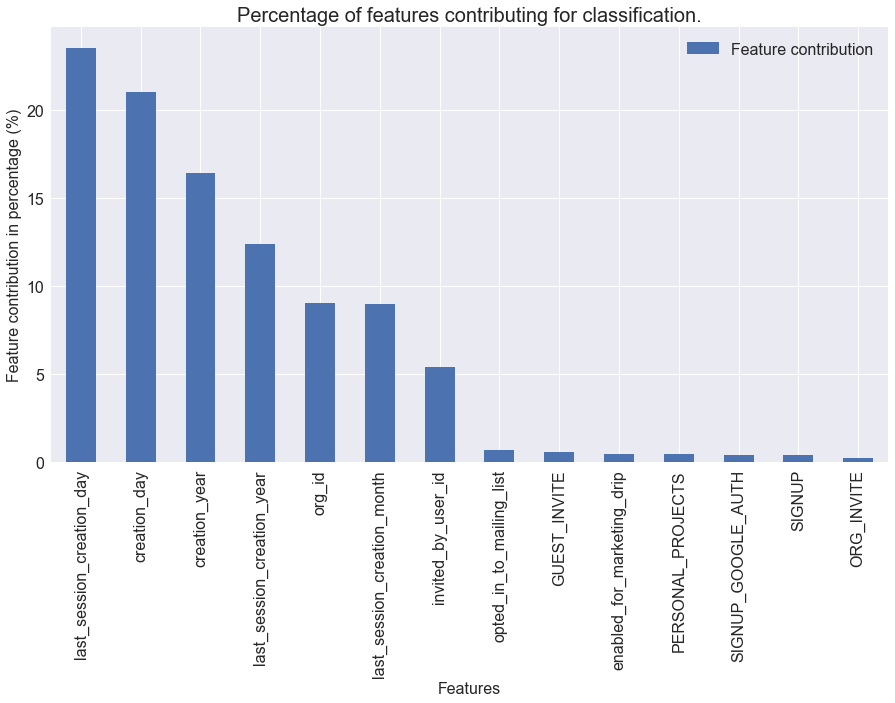

In [51]:
feature_imp_df.plot(kind='bar',x='Feature', figsize=(15, 8), fontsize=16)
plt.ylabel('Feature contribution in percentage (%)', fontsize=16)
plt.xlabel('Features',fontsize=16)
plt.legend(fontsize=16)
plt.title('Percentage of features contributing for classification.',fontsize=20)
plt.show()

From the above plot we see last_session_creation, creation_time played a huge contribution with close to 80% contribution followed by org_id and invited_by_user_id.

**NOTE:**<br>
The data for modeling was engineered from users activity information, if the user_id did not have any activity logged prediction cannot be done for the user.